<a href="https://colab.research.google.com/github/dlghwns100/today_TIL/blob/main/ex03)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_iris%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 머신러닝에서 사용해봤던 iris 품종 예측 다중분류 문제를 신경망으로 풀어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# iris 데이터셋 임포트
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = data['data']
y = data['target']

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 정답 데이터 인코딩
- 신경망 출력층에서 각 클래스 값들에 대한 확률(0-1)값과 비교하여 정확한 오차를 구하기 위해서 정답의 범위도 0~1사이 값으로 변환시켜줘야함

In [ ]:
y_one_hot = pd.get_dummies(y)
y_one_hot

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_one_hot,
                                                    test_size=0.2,
                                                    random_state=55
                                                    )

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


### 신경망 모델링
- 1, 신경망 구조 설계
- 2, 학습 및 평가방법 설정
- 3, 학습 + 시각화
- 4, 모델평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 신경맘 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)

model.add(Dense(50, input_dim= 4, activation= 'sigmoid'))

# 중간츨
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화함수는 sigmoid로 고정)
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 50)                250       
                                                                 
 dense_56 (Dense)            (None, 100)               5100      
                                                                 
 dense_57 (Dense)            (None, 50)                5050      
                                                                 
 dense_58 (Dense)            (None, 3)                 153       
                                                                 
Total params: 10,553
Trainable params: 10,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
               optimizer='Adam', #최적화함수 : 확률적경사하강법(SGD) 활용
               metrics=['acc'] # metrics :평가밥법을 설정(분류 문제이므로 정확도 출력 필요)
               )

In [ ]:
h = model.fit(X_train, y_train,
              epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.1136 - acc: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0966 - acc: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0918 - acc: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0913 - acc: 0.3750
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0895 - acc: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0824 - acc: 0.3417
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0785 - acc: 0.3417
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0750 - acc: 0.6083
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0693 - acc: 0.6667
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0648 - acc: 0.6500
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0593 

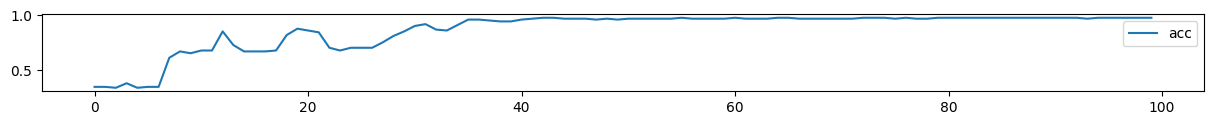

In [ ]:
# 3. 시각화
plt.figure(figsize=(15,1))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

In [ ]:
# 4, 모델평가
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 157ms/step - loss: 0.0905 - acc: 0.9667


[0.09051011502742767, 0.9666666388511658]